In [ ]:
# DELETE THIS CELL IN THE STUDENT NOTEBOOK
# Create the student notebook
!pip install gsexport -q
import gsExport
!jupyter nbconvert notebook1_instructor.ipynb --NotebookExporter.preprocessors="['gsExport.gsExportPreprocessor']" --to notebook

# Biogeography Notebook 1

The goal of this notebook is to access and integrate diverse data sets to visualize correlations and discover patterns to address questions of species’ responses to environmental change. We will use programmatic tools to show how to use Berkeley resources such as the biodiversity data from biocollections and online databases, field stations, climate models, and other environmental data. If you have any questions getting the Jupyter notebook to run, try dropping into [data peer consulting](https://data.berkeley.edu/education/data-peer-consulting).

Before we begin analyzing and visualizing biodiversity data, this introductory notebook will help familiarize you with the basics of programming in Python.

## Table of Contents

0 - [Jupyter Notebooks](#jupyter)
    
1 - [Python Basics](#python)

2 - [GBIF API](#gbif)


# Part 0: Our Computing Environment, Jupyter notebooks  <a id='jupyter'></a>
This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results. 

### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. You can also hold `shift` and then press `enter` or `return`. (Try not to delete the instructions of the lab.)

### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press ▶| or hold down the `shift` key and press `return` or `enter`.

Try running this cell:

In [1]:
print("Hello, World!")

Hello, World!


And this one:

In [2]:
print("\N{WAVING HAND SIGN}, \N{EARTH GLOBE ASIA-AUSTRALIA}!")

👋, 🌏!


## Help
If you need help with how to use a Jupyter notebook you can go to the Help menu. There are also more handy keyboard shortcuts found there as well!

In order to finish the setup for this notebook, **run the following cell**:

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scripts.espm_module import *
import json
from pandas import json_normalize
from IPython.core.display import display, HTML
plt.style.use('seaborn')
%matplotlib inline

# Part 1: Python basics <a id='python'></a>
Before getting into the more high level analyses we will do on the GBIF and Cal-Adapt data, we need to cover a few of the foundational elements of programming in Python.

#### A. Expressions
The departure point for all programming is the concept of the __expression__. An expression is a combination of variables, operators, and other Python elements that the language interprets and acts upon. Expressions act as a set of instructions to be fed through the interpreter, with the goal of generating specific outcomes. See below for some examples of basic expressions. Keep in mind that most of these just map to your understanding of mathematical expressions:

In [4]:
2 + 2

'me' + ' and I'

12 ** 2

6 + 4

10

You will notice that only the last line in a cell gets printed out. If you want to see the values of previous expressions, you need to call the `print` function on that expression. Functions use parenthesis around their parameters, just like in math!

In [5]:
print(2 + 2)

print('you' + ' and I')

print(12 ** 2)

print(6 + 4)

4
you and I
144
10


#### B. Variables
In the example below, `a` and `b` are Python objects known as __variables__. We are giving an object (in this case, an `integer` and a `float`, two Python data types) a name that we can store for later use. To use that value, we can simply type the name that we stored the value as. Variables are stored within the notebook's environment, meaning stored variable values carry over from cell to cell.

In [6]:
a = 4
b = 10/5

Notice that when you create a variable, unlike what you previously saw with the expressions, it does not print anything out.

We can continue to perform mathematical operations on these variables, which are now placeholders for what we've assigned:

In [7]:
print(a + b)

6.0


#### C. Lists
The following few cells will introduce the concept of __lists__.

A list is an ordered collection of objects. They allow us to store and access groups of variables and other objects for easy access and analysis. Check out this [documentation](https://www.tutorialspoint.com/python/python_lists.htm) for an in-depth look at the capabilities of lists.

To initialize a list, you use brackets. Putting objects separated by commas in between the brackets will add them to the list. 

We use `lst` as the variable name because `list` is a reserved keyword in Python (meaning it has special functionality and shouldn't be used as a variable name).

In [8]:
# an empty list
lst = []
print(lst)

# reassigning our empty list to a new list
lst = [1, 3, 6, 'lists', 'are' 'fun', 4]
print(lst)

[]
[1, 3, 6, 'lists', 'arefun', 4]






To access a value in the list, put the index of the item you wish to access in brackets following the variable that stores the list. Lists in Python are zero-indexed, so the indicies for `lst` are 0, 1, 2, 3, 4, 5, and 6.

In [9]:
# Elements are selected like this:
example = lst[2]

# The above line selects the 3rd element of lst (list indices are 0-offset) and sets it to a variable named example.
print(example)

6


#### D. Dictionaries

Dictionaries are `key`-`value` pairs. Just like a word dictionary, you have a key that will index a specific definition.

In [10]:
my_dict = {'python': 'a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.'}

We can get a `value` back out by indexing the `key`:

In [11]:
my_dict['python']

'a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.'

But like real dictionaries, there can be more than one definition. You can keep a `list`, or even another dictionary within a specific `key`:

In [12]:
my_dict = {'python': ['a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.',
                      'a high-level general-purpose programming language.']}

We can index the `list` after the `key`:

In [13]:
my_dict['python'][0]

'a large heavy-bodied nonvenomous constrictor snake occurring throughout the Old World tropics.'

In [14]:
my_dict['python'][1]

'a high-level general-purpose programming language.'

**E: Functions**

In programming, we often reuse chunks of code. So instead of copy/pasting it and repeating the same code over and over again, we have something called a function, which gives a name to a block of code. This allows us to just call the function instead of rewriting code we used before.

For example, this is a function that squares an input.

In [15]:
# This code creates a function named square
def square(n):
    return n * n

In [16]:
# Let's find the square of 5
square(5)

25

In [17]:
# Let's try it with -3
square(-3)

9

Our use of functions later in the notebook is more complex than this example. We will use them in order to reduce the amount of code in this notebook. For now, you can just ignore the details and structure of how functions work. Just remember that a **function** is a shortcut to easily re-run old code and that the `def` keyword means we are creating a function.

---

# Part 2: GBIF API<a id='gbif'></a>

Click on the [link](http://www.gbif.org/) to the GBIF website to discover what GBIF can do!

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 1:</b>
    <br />
    What does GBIF stand for and who is it coordinated by?
</div>

#student

YOUR RESPONSE HERE -- **Double click on this box and type in your answer! Then hit run.**

GBIF has created an API that we can use to get data about different species at the [GBIF Web API](http://www.gbif.org/developer/summary).

You can think of a Web API call as a fancy URL. What do you think the end of this URL means?

http://api.gbif.org/v1/occurrence/search?year=1800,1899

If you're guessing that it limits the search to the years 1800-1899, you're right! Go ahead and click the URL above. You should see something like this:

```
{"offset":0,"limit":20,"endOfRecords":false,"count":5711947,"results":[{"key":14339704,"datasetKey":"857aa892-f762-11e1-a439-00145eb45e9a","publishingOrgKey":"6bcc0290-6e76-11db-bcd5-b8a03c50a862","publishingCountry":"FR","protocol":"BIOCASE","lastCrawled":"2013-09-07T07:06:34.000+0000","crawlId":1,"extensions":{},"basisOfRecord":"OBSERVATION","taxonKey":2809968,"kingdomKey":6,"phylumKey":7707728,"classKey":196,"orderKey":1169,"familyKey":7689,"genusKey":2849312,"speciesKey":2809968,"scientificName":"Orchis militaris L.","kingdom":"Plantae","phylum":"Tracheophyta","order":"Asparagales","family":"Orchidaceae","genus":"Orchis","species":"Orchis 
```

It might look like a mess, but it's not! This is actually very structured data, and can easily be put into a table like format, though often programmers don't do this because it's just as easy to keep it as is.

You might be able to pick out the curly braces `{` and think this it's a dictionary. You'd be right, except in this format we call it [JSON](https://en.wikipedia.org/wiki/JSON).

---

## *Argia arioides*

![argia arioides](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Argia_agrioides-Male-1.jpg/220px-Argia_agrioides-Male-1.jpg)

When performing data analysis, it is always important to define a question that you seek the answer to. *The goal of finding the answer to this question will ultimately drive the queries and analysis styles you choose to use/write.*

For this example, we are going to ask: **where have [*Argia agrioides*](https://www.google.com/search?q=Argia+agrioides&rlz=1C1CHBF_enUS734US734&source=lnms&tbm=isch&sa=X&ved=0ahUKEwji9t29kNTWAhVBymMKHWJ-ANcQ_AUICygC&biw=1536&bih=694) (the California Dancer dragonfly) been documented? Are there records at any of our field stations?**

The code to ask the API has already been written for us! This is often the case with programming, someone has already written the code, so we don't have to. We'll just set up the `GBIFRequest` object and assign that to the variable `req`, short for "request":

In [18]:
req = GBIFRequest()  # creating a request to the API

Great, so how do we make searches? We can use a Python `dictionary` to create our query parameters. We'll ask for the `scientificName` of the California Dancer (*Argia arioides*):

In [19]:
params = {'scientificName': 'Argia agrioides'}  # setting our parameters (the specific species we want)

Now that we have the parameters, we can feed this to our `req` variable to get back all the pages of data. We'll then make sure that each record has a `decimalLatitude`, otherwise we'll thow it out for now. Lastly, we'll print out the first five records:

In [29]:
params = {'scientificName': 'Argia agrioides'}  # setting our parameters (the specific species we want)
pages = req.get_pages(params)  # using those parameters to complete the request
records = [rec for page in pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
records[:5]  # print first 5 records

[{'key': 2596088009,
  'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
  'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
  'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
  'publishingCountry': 'US',
  'protocol': 'DWC_ARCHIVE',
  'lastCrawled': '2020-09-06T07:49:09.150+0000',
  'lastParsed': '2020-09-06T09:40:40.376+0000',
  'crawlId': 230,
  'extensions': {},
  'basisOfRecord': 'HUMAN_OBSERVATION',
  'occurrenceStatus': 'PRESENT',
  'taxonKey': 5051459,
  'kingdomKey': 1,
  'phylumKey': 54,
  'classKey': 216,
  'orderKey': 789,
  'familyKey': 8577,
  'genusKey': 1422607,
  'speciesKey': 5051459,
  'acceptedTaxonKey': 5051459,
  'scientificName': 'Argia agrioides Calvert, 1895',
  'acceptedScientificName': 'Argia agrioides Calvert, 1895',
  'kingdom': 'Animalia',
  'phylum': 'Arthropoda',
  'order': 'Odonata',
  'family': 'Coenagrionidae',
  'genus': 'Argia',
  'species': 'Argia agrioides',
  'genericName': 'Argia',
  'specificEpithet': 'agrioides',
  'tax

That was a lot of code for something that we will be doing multiple times. Instead of copy/pasting that code when we want to get more species records, we can just create something called a function to get the records for us. For now, think of a function as a shortcut to re-run larger chunks of code as one command. The following code cell defines a function to get a given species' records. Notice how almost all of the indented code is the same code we ran above.

In [30]:
def get_species_records(scientific_name):
    req = GBIFRequest()  # creating a request to the API
    params = {'scientificName': scientific_name}  # setting our parameters (the specific species we want)
    pages = req.get_pages(params)  # using those parameters to complete the request
    records = [rec for page in pages for rec in page['results'] if rec.get('decimalLatitude')]  # sift out valid records
    return records

Because we have defined a function, we can get the records of a species in just one line using "get_species_records!"

In [31]:
records = get_species_records('Argia agrioides') # Get the species records using the function we defined
records[:5] # Show the first five rows of the records we obtained

[{'key': 2596088009,
  'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
  'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
  'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
  'publishingCountry': 'US',
  'protocol': 'DWC_ARCHIVE',
  'lastCrawled': '2020-09-06T07:49:09.150+0000',
  'lastParsed': '2020-09-06T09:40:40.376+0000',
  'crawlId': 230,
  'extensions': {},
  'basisOfRecord': 'HUMAN_OBSERVATION',
  'occurrenceStatus': 'PRESENT',
  'taxonKey': 5051459,
  'kingdomKey': 1,
  'phylumKey': 54,
  'classKey': 216,
  'orderKey': 789,
  'familyKey': 8577,
  'genusKey': 1422607,
  'speciesKey': 5051459,
  'acceptedTaxonKey': 5051459,
  'scientificName': 'Argia agrioides Calvert, 1895',
  'acceptedScientificName': 'Argia agrioides Calvert, 1895',
  'kingdom': 'Animalia',
  'phylum': 'Arthropoda',
  'order': 'Odonata',
  'family': 'Coenagrionidae',
  'genus': 'Argia',
  'species': 'Argia agrioides',
  'genericName': 'Argia',
  'specificEpithet': 'agrioides',
  'tax

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 2:</b>
    <br />
    In one or two sentences, explain: Why might it be valuable to know the documented occurences of a species? Name one organization which would find this information useful.
</div>

#student

YOUR RESPONSE HERE

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 3:</b>
    <br />
    In one or two sentences, explain: What is the geographic range of an organism.
</div>

#student

YOUR RESPONSE HERE

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 4:</b>
    <br />
    In a short paragraph, explain: How can museum records help us to understand how populations are changing?
</div>

#student

YOUR RESPONSE HERE

---

### DataFrames

The JSON-format data we looked at above contains helpful information but it's really hard to see look through. The text we saw above was just the first 5 entries! Instead, let's create a table that organizes this data for us. We'll use the popular [Pandas](http://pandas.pydata.org/) Python library. In `pandas`, a DataFrame is a table that has several convenient features that make it much easier to read, access, and analyze data.

In [32]:
records_df = json_normalize(records)  # converts the JSON above to a dataframe
records_df.head()                               # prints the first five rows of the dataframe

,key,datasetKey,publishingOrgKey,installationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,basisOfRecord,...,disposition,previousIdentifications,ownerInstitutionCode,datasetID,bibliographicCitation,georeferencedBy,georeferenceVerificationStatus,acceptedNameUsage,otherCatalogNumbers,organismID
0,2596088009,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:40:40.376+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2597716824,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:57:19.078+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2597853826,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:58:13.098+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2574229515,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:40:21.793+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2596274195,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:58:23.916+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since we're going to want to get DataFrames of species records several times in the future, let's also create function that does this for us.

In [35]:
def get_species_records_df(scientific_name):
    records = get_species_records(scientific_name) # Get the records using the function we defined earlier
    records_df = json_normalize(records) # Convert the raw records into a DataFrame
    return records_df

In [57]:
records_df = get_species_records_df('Argia agrioides')

DataFrames have a shape attribute which describes its row and column count.

In [58]:
records_df.shape

(349, 122)

So we have 318 rows and 116 columns! That's a lot of information. What variables do we have in the columns?

In [59]:
list(records_df.columns) # Show a list containing the names of every column in our DataFrame

['key',
 'datasetKey',
 'publishingOrgKey',
 'installationKey',
 'publishingCountry',
 'protocol',
 'lastCrawled',
 'lastParsed',
 'crawlId',
 'basisOfRecord',
 'occurrenceStatus',
 'taxonKey',
 'kingdomKey',
 'phylumKey',
 'classKey',
 'orderKey',
 'familyKey',
 'genusKey',
 'speciesKey',
 'acceptedTaxonKey',
 'scientificName',
 'acceptedScientificName',
 'kingdom',
 'phylum',
 'order',
 'family',
 'genus',
 'species',
 'genericName',
 'specificEpithet',
 'taxonRank',
 'taxonomicStatus',
 'dateIdentified',
 'decimalLongitude',
 'decimalLatitude',
 'stateProvince',
 'year',
 'month',
 'day',
 'eventDate',
 'issues',
 'modified',
 'lastInterpreted',
 'references',
 'license',
 'identifiers',
 'media',
 'facts',
 'relations',
 'geodeticDatum',
 'class',
 'countryCode',
 'recordedByIDs',
 'identifiedByIDs',
 'country',
 'rightsHolder',
 'identifier',
 'http://unknown.org/nick',
 'verbatimEventDate',
 'datasetName',
 'collectionCode',
 'gbifID',
 'verbatimLocality',
 'occurrenceID',
 'taxo

We can also use Pandas to analyze and visualize our data. The `value_counts()` function groups our data by a specified column and counts the number of occurrences of each column value.

In [60]:
# How many records are there from every country
records_df['country'].value_counts()

United States of America    277
Mexico                       72
Name: country, dtype: int64

This tells us that we're looking at data from the US and Mexico. For small examples, this is sufficient, but for columns with more unique values, it might be helpful to look at a bar graph instead. Pandas has a `bar` function that does that for us. Don't worry about the specific syntax of how we do this.

In the following series of graphs, you might notice that we switch between horizontal and vertical bar graphs. We are going to pick whichever one we think makes our graph easier to read. There isn't much of a difference beyond that.

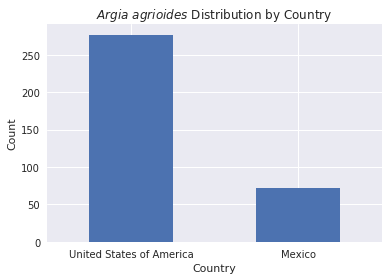

In [61]:
# Group the data by country and then plot it
records_df['country'].value_counts().plot.bar();

# This makes the graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by Country');
plt.xticks(rotation=0);
plt.xlabel('Country');
plt.ylabel('Count');

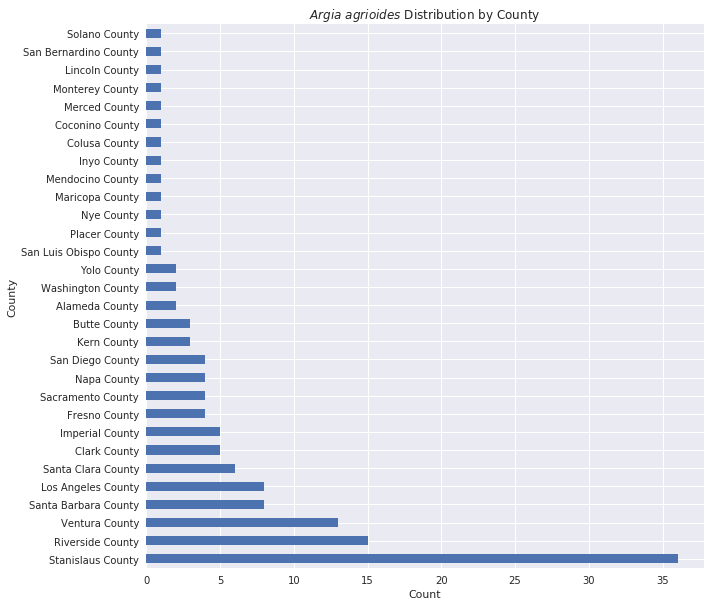

In [62]:
# Code to quickly clean up county names
# You can ignore this
def clean_up_county(col):
    if type(col) == float and np.isnan(col):
        return None
    else:
        return col.replace(' Co.', '').replace(' County', '') + ' County'

# Use the function defined above to clean up county names
records_df['county_cleaned'] = records_df['county'].apply(clean_up_county)

# Make graph easier to read
plt.figure(figsize=(10,10)) # Change graph size
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by County')
plt.xlabel('Count')
plt.ylabel('County')

# Horizontal Bar Plot so that county names fit
records_df['county_cleaned'].value_counts().plot.barh();

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 5:</b>
    <br />
    How many counties have only one record of <i>Argia agrioides</i>? 
</div>

#student

YOUR RESPONSE HERE

Here's an example of Pandas code that can calculate it for you. It's kind of confusing so don't sweat the details. Compare this with your answer above.

In [63]:
sum(records_df['county_cleaned'].value_counts() == 1)

13

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 6:</b>
    <br />
    Stanislaus County has the highest record of <i>Argia agrioides</i>. Other than high abundance of the species in this county, can you think of a reason why there is a high number of records here?
</div>

#student

YOUR RESPONSE HERE

Let's take a look at how each record was obtained.

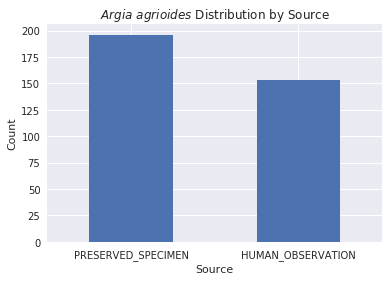

In [76]:
records_df['basisOfRecord'].value_counts().plot.bar();

# This makes the graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by Source');
plt.xticks(rotation=0);
plt.xlabel('Source');
plt.ylabel('Count');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 7:</b>
    <br />
    In a two or three sentences, explain: What are some cautions that should be taken when including human observations? What are the benefits? 
</div>

#student

YOUR RESPONSE HERE

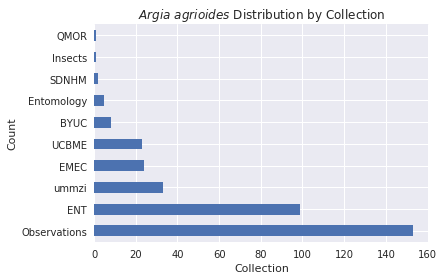

In [77]:
records_df['collectionCode'].value_counts().plot.barh();

# This makes the graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by Collection');
plt.xlabel('Collection');
plt.ylabel('Count');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 8:</b>
    <br />
    Each museum has a unique institution code (called a collection code). How many records belong to the Essig Museum of Entomology Collection?
</div>

#student

YOUR RESPONSE HERE

It's harder to check the exact number of records this time because the scale is larger. Let's check how close your answer was to the true amount.

In [78]:
sum(records_df['collectionCode'] == 'EMEC')

24

---

The `groupby()` method allows us to group our data by the values in a specified column. We can then graph our data.

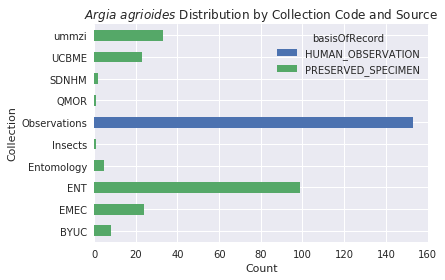

In [79]:
records_df.groupby(["collectionCode", "basisOfRecord"])['basisOfRecord'].count().unstack().plot.barh(stacked=True);

# This makes the graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by Collection Code and Source');
plt.xticks(rotation=0);
plt.xlabel('Count');
plt.ylabel('Collection');

Here's another example using County and Collection Code.

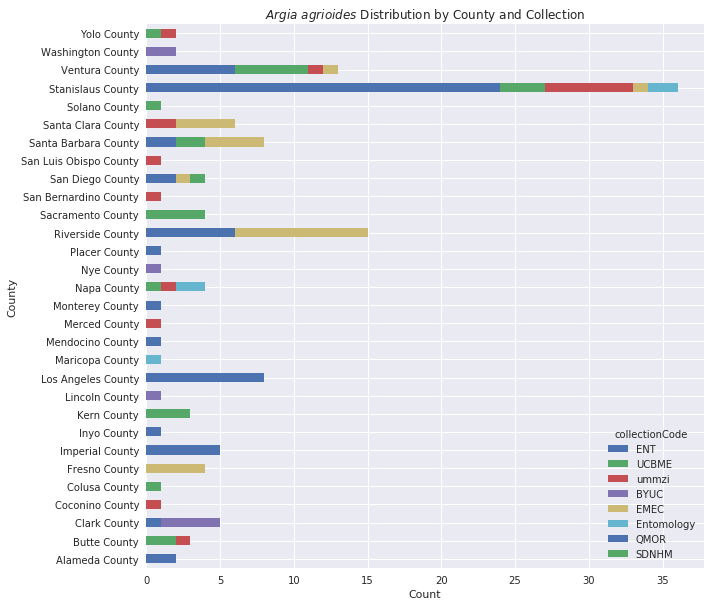

In [80]:
records_df.groupby(["county_cleaned", "collectionCode"])['collectionCode'].count().unstack().plot.barh(stacked=True, figsize=(10, 10));

# Make graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by County and Collection');
plt.xlabel('Count');
plt.ylabel('County');

And we can use `plot.hist()` to make a histogram:

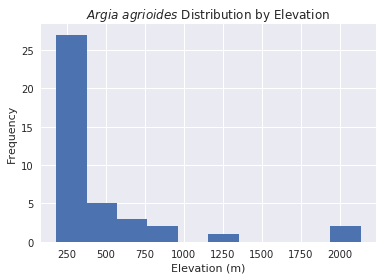

In [81]:
records_df['elevation'].plot.hist();

# Make graph easier to read
plt.title(r"${Argia}$" + r" ${agrioides}$" + ' Distribution by Elevation')
plt.xlabel('Elevation (m)');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 9:</b>
    <br />
    In a few sentences, explain: What does plotting the elevation indicate about the distribution of <i>Argia agrioides</i>? What additional information would you want to gather to better understand the biological mechanisms limiting the range of <i>Argia agrioides</i>?
</div>

#student

YOUR RESPONSE HERE

---

<div class="alert alert-block alert-info">
    <b>EXERCISE 1:</b>
    <br />
    Edit the code below to search for a species you're interested in, then use the graphing cells below to explore your data! Pick a species from North America and replace the "..." in the box below with its scientific name. Make sure to add quotation marks around the name! You can google search or use the GBIF website to find a species that interests you. Don't pick a domesticated species. 
     Please note that a species name has two parts, the first part is the genus name and the second part is the specific epithat. If the exercise doesn't work for the species that you choose, try a new species until all of the graphs generate correctly.
</div>


In [82]:
# Replace the ... in the line below with your species
my_records_df = get_species_records_df('...')
my_records_df.head() # Show the first 5 records

,key,datasetKey,publishingOrgKey,installationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,basisOfRecord,...,disposition,previousIdentifications,ownerInstitutionCode,datasetID,bibliographicCitation,georeferencedBy,georeferenceVerificationStatus,acceptedNameUsage,otherCatalogNumbers,organismID
0,2596088009,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:40:40.376+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2597716824,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:57:19.078+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2597853826,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:58:13.098+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2574229515,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:40:21.793+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2596274195,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,US,DWC_ARCHIVE,2020-09-06T07:49:09.150+0000,2020-09-06T09:58:23.916+0000,230,HUMAN_OBSERVATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If the output above doesn't contain a table, that means either you didn't enter a proper scientific name or the scientific name isn't in the database. Make sure you typed it correctly without abbreviating the species name. You might also have to use a different capitalization.

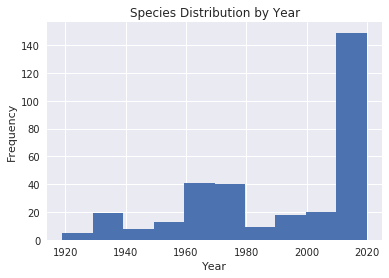

In [83]:
my_records_df['year'].plot.hist();

# Make graph easier to read
plt.title('Species Distribution by Year')
plt.xlabel('Year');

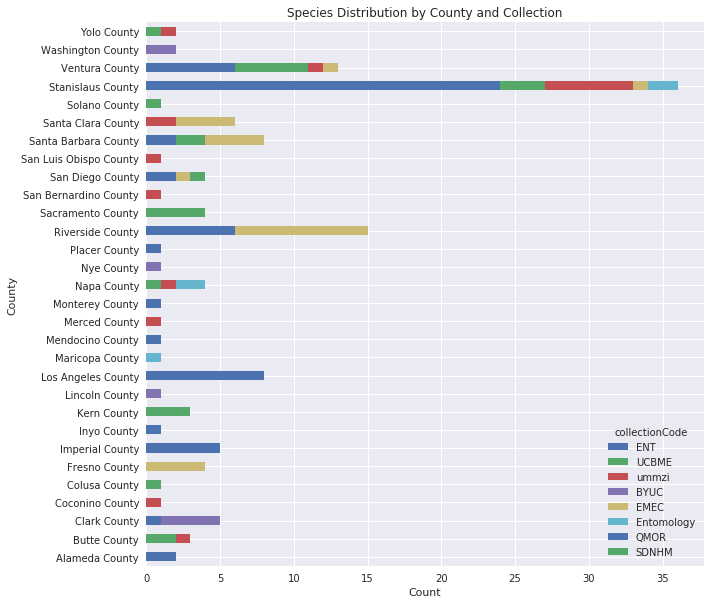

In [84]:
# Alternative plot to use if there isn't a collection code
# my_records_df['county'].value_counts().plot.barh();

my_records_df['county_cleaned'] = my_records_df['county'].apply(clean_up_county)
my_records_df.groupby(["county_cleaned", "collectionCode"])['collectionCode'].count().unstack().plot.barh(stacked=True, figsize=(10, 10));

# Make graph easier to read
plt.title('Species Distribution by County and Collection');
plt.xlabel('Count');
plt.ylabel('County');

<b>Note: </b> If the species you chose is distributed globally, the above plot may look a bit odd or the cell may have errored. Uncomment the cell below (you can highlight the entire cell and enter Control + / on PC or Command + / on Mac on your keyboard) and run it to see the same chart but with countries instead of counties.

In [85]:
# my_records_df.groupby(["country", "collectionCode"])['collectionCode'].count().unstack().plot.barh(stacked=True, figsize=(10, 10));
# plt.title('Species Distribution by Country and Collection');
# plt.xlabel('Count');
# plt.ylabel('Country');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 10:</b>
    <br />
    What county has the highest number records? If you chose a globally distributed species, what country has the highest number of records?
</div>

#student

YOUR RESPONSE HERE

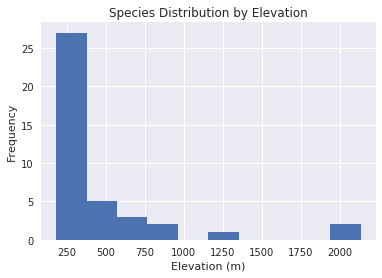

In [86]:
my_records_df['elevation'].plot.hist();

# Make graph easier to read
plt.title('Species Distribution by Elevation')
plt.xlabel('Elevation (m)');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 11:</b>
    <br />
    What is the elevation range of your organism?
    <br/>
    <i>Note:</i> Depending on the species you have chosen, your data frame might not have any values to plot. Why might that be? If this is the case for your species, explain that in your answer here, then go back and try another species.
</div>

#student

YOUR RESPONSE HERE

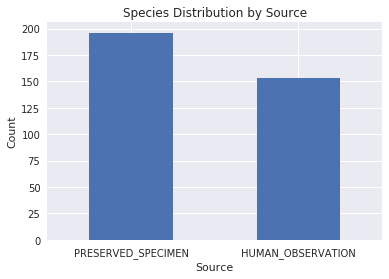

In [87]:
my_records_df['basisOfRecord'].value_counts().plot.bar();

# This makes the graph easier to read
plt.title('Species Distribution by Source');
plt.xticks(rotation=0);
plt.xlabel('Source');
plt.ylabel('Count');

#student
<div class="alert alert-block alert-warning">
    <b>QUESTION 12:</b>
    <br />
    Which has more: observations or preserved specimens? Why might this be? Are there any additional specimen sources for your organism?
</div>

#student

YOUR RESPONSE HERE

---

**Make sure that you've answered questions 1-12. Also make sure you've done the 1 code exercise.**

You are finished with this notebook! Please run the following cell to generate a download link for your submission file to submit on bCourses. ***It is very likely that this download link will not work. If the download link does not work, please use the alternate download method described below.***

Alternate download instructions:
- open a new tab and go to https://datahub.berkeley.edu
- go to the "IB-105-ESPM-125-fa20" folder
- click the box next to `notebook1_submission.pdf`
- click the "Download" link below the menu bar

**Check the PDF before submitting and make sure all of your answers & code changes are shown.**

In [89]:
!pip install gsexport -q
import gsExport
gsExport.generateSubmission("notebook1.ipynb")

Processing notebook1.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF


---

Notebook developed by: Michelle Koo, Nina Pak, Natalie Graham, Monica Wilkinson, Andy Sheu, Harry Li

[Data Science Modules](http://data.berkeley.edu/education/modules)